Simplyhired.com EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
import re

In [2]:
df = pd.read_csv('SimplyHiredCleanData.csv')

In [3]:
df.head()

,title,salary,company,description,location,city,state
0,data analyst,110000.0,cognizant technology solutions,perform data analysis on large volume of healt...,"['detroit', ' mi']",detroit,mi
1,data analyst/statistician,77749.0,us department of veterans affairs,create processes for assessing quality and acc...,"['ann arbor', ' mi']",ann arbor,mi
2,data analyst,110000.0,best egg,"in addition to semi-monthly salary payments, t...",['remote'],remote,NaN
3,data analyst,104000.0,integrityatl,to do well in this role you need a very fine e...,['united states'],united states,NaN
4,program associate i - data analyst,74395.0,dpscd,demonstrated success in analyzing and interpre...,"['detroit', ' mi']",detroit,mi


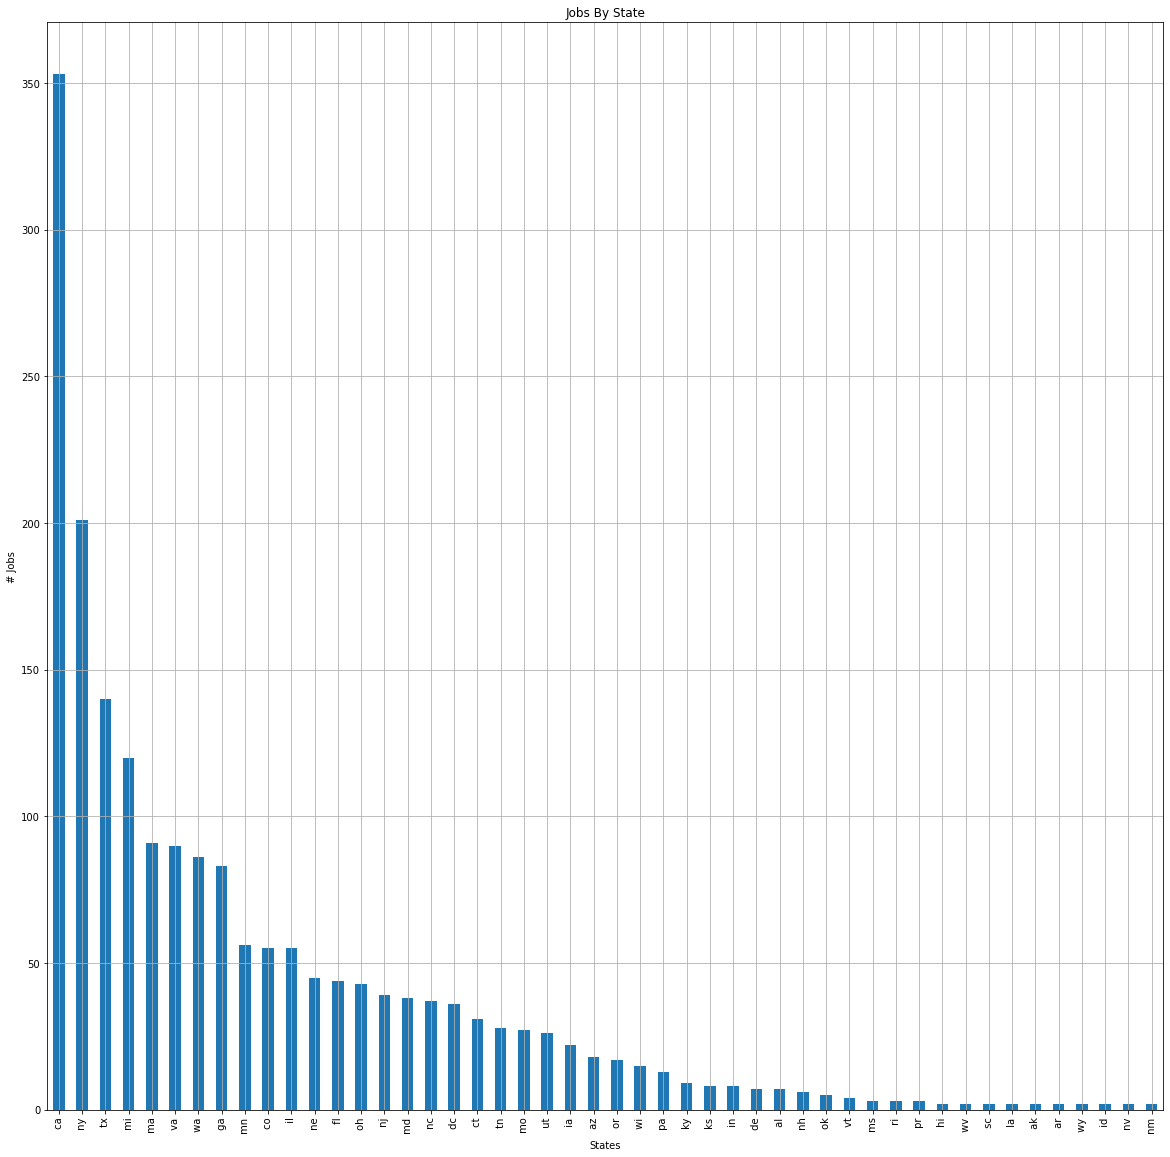

In [4]:
from matplotlib import pyplot as plt
#
state_group = df.state.value_counts()
fig = plt.figure(figsize = (20,20))
state_group.plot.bar()
plt.title('Jobs By State')
plt.xlabel("States")
plt.ylabel("# Jobs")
plt.grid()
plt.show()

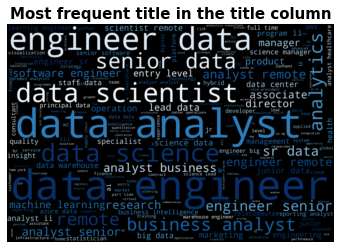

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, colormap="Blues").generate(" ".join(df.title))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Most frequent title in the title column', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

In [6]:
df['is_remote'] = np.where(df['location'].str.contains('remote'),1,0)
df

,title,salary,company,description,location,city,state,is_remote
0,data analyst,110000.000000,cognizant technology solutions,perform data analysis on large volume of healt...,"['detroit', ' mi']",detroit,mi,0
1,data analyst/statistician,77749.000000,us department of veterans affairs,create processes for assessing quality and acc...,"['ann arbor', ' mi']",ann arbor,mi,0
2,data analyst,110000.000000,best egg,"in addition to semi-monthly salary payments, t...",['remote'],remote,NaN,1
3,data analyst,104000.000000,integrityatl,to do well in this role you need a very fine e...,['united states'],united states,NaN,0
4,program associate i - data analyst,74395.000000,dpscd,demonstrated success in analyzing and interpre...,"['detroit', ' mi']",detroit,mi,0
...,...,...,...,...,...,...,...,...
2993,"postdoctoral fellow, data science rwe advanced...",115871.092967,johnson & johnson,"at johnson & johnson, we use technology and th...",['united states'],united states,NaN,0
2994,sr associate data scientist (remote),128250.000000,"the travelers companies, inc.","who are we? taking care of our customers, our ...","['hartford', ' ct']",hartford,ct,0
2995,data analyst with databricks,130000.000000,datapattern,* work with stakeholders such as business user...,['remote'],remote,NaN,1
2996,research statistician,115871.092967,the geneva foundation,overview: the geneva foundation is a non-profi...,"['san antonio', ' tx']",san antonio,tx,0


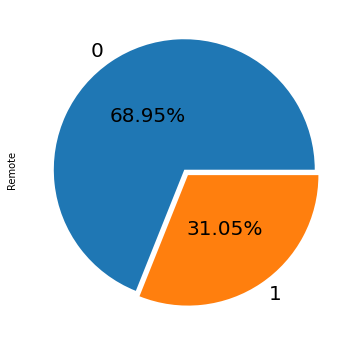

In [7]:
separate = [0, 0.05]
pie = df['is_remote'].value_counts().plot.pie(
            explode=separate,
            autopct=(lambda p : '{:.2f}%'.format(p)),
            fontsize=20,label='Remote', pctdistance=0.5,
            figsize=(6, 6))

**Salary Analysis**

Average Salary by State

In [8]:
df['salary'].value_counts()
df['salary'].astype(int)
dss=df.groupby('state')['salary'].sum().sort_values(ascending = False)
dcs=df.groupby('state')['salary'].count().sort_values(ascending = False)
das=dss/dcs
state_average=das.sort_values(ascending =False)

state
 wa    123560.158293
 id    122935.546484
 tx    122568.730568
 ga    121801.793184
 dc    119326.615928
 ca    117984.890172
 ny    117727.057866
 ne    116606.600728
 mn    116502.857324
 ut    116029.109434
 wv    115871.092967
 wy    115871.092967
 hi    115871.092967
 ar    115871.092967
 de    115813.965401
 nc    115319.195438
 md    114786.146669
 va    114783.473168
 ma    114713.566654
 az    113901.929426
 il    113800.170582
 pr    113647.395312
 oh    112876.185464
 ok    112696.874374
 nj    112478.837780
 or    112092.589567
 mo    111455.286341
 ky    110615.738975
 co    110360.355724
 nh    109997.395312
 ri    109747.395312
 wi    109698.801509
 nv    108750.000000
 ks    107215.819726
 mi    107195.551028
 ct    106991.178150
 fl    106599.292772
 ak    106081.700000
 pa    105701.812139
 sc    105700.000000
 nm    104189.750000
 tn    103354.138839
 vt     99866.919726
 in     99354.433105
 ia     95401.556534
 la     94900.000000
 al     94199.124553
 ms    

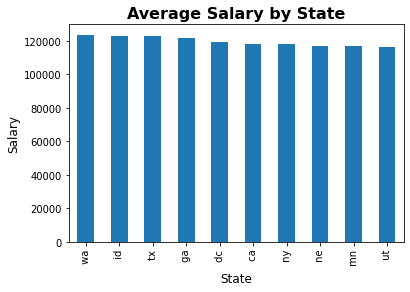

In [9]:
state_average[:10].plot.bar()
plt.xlabel('State', fontsize=12, color ='black')
plt.ylabel('Salary', fontsize=12, color ='black')
plt.title('Average Salary by State', fontsize=16, color ="black", fontweight="bold")
print(state_average)

Interestingly, California has the highest average salary on other job websites, but is 4th on simplyhired.com.  Washington has the highest average salary on simplyhired.com

Average Salary by Company

company
otcfin                                      310000.0
guild education                             278750.0
university at buffalo                       270000.0
amazon                                      262500.0
dezign concepts llc                         250000.0
                                              ...   
high bridge consulting llc                   42640.0
teamson                                      42500.0
missouri department of natural resources     40776.0
gss                                          35000.0
volga partners                               33280.0
Name: salary, Length: 2011, dtype: float64


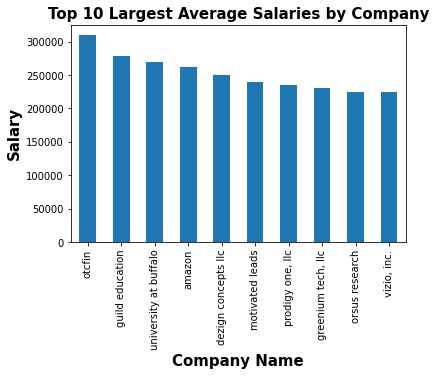

In [10]:
df['salary'].value_counts()
df['salary'].astype(int)
ds=df.groupby('company')['salary'].sum().sort_values(ascending = False)
dc=df.groupby('company')['salary'].count().sort_values(ascending = False)
da=ds/dc
daa=da.sort_values(ascending =False)
daa[:10].plot.bar()
plt.xlabel('Company Name', fontsize=15, color ="black",fontweight="bold")
plt.ylabel('Salary', fontsize=15, color ="black",fontweight="bold")
plt.title('Top 10 Largest Average Salaries by Company', fontsize=15, color ="black", fontweight="bold")
print(daa)

With Amazon being a large, money making company, it only has the 4th largest average salary.

Text(0.5, 1.0, 'Companies Looking to Hiring')

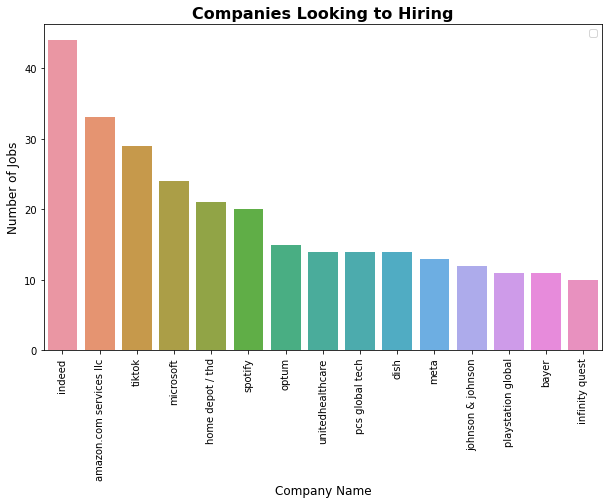

In [11]:
who_is_hiring=df.groupby(['company'])['title'].count()     
who_is_hiring=who_is_hiring.reset_index()
who_is_hiring=who_is_hiring.sort_values(['title'],ascending=False)
who_is_hiring=who_is_hiring.head(15) 

fig,a=plt.subplots(figsize=(10,6))             
a=sns.barplot(x="company", y="title", data=who_is_hiring);    
a.set_xticklabels(who_is_hiring['company'],rotation=90) 
a.legend(loc='upper right')
a.set_ylabel('Number of Jobs',fontsize=12,color='black')
a.set_xlabel('Company Name',fontsize=12,color='black') 
a.set_title("Companies Looking to Hiring",fontsize=16,color='black', fontweight='bold')



The companies looking to higher the most are paying well under the average salary of the companies with the highest average salary.


In [12]:
df.where((df["company"] == "indeed")).salary.mean()

175272.72727272726

In [13]:
df.where((df["company"] == "amazon.com services llc")).salary.mean()

134752.88792556786

In [14]:
df.where((df["company"] == "tiktok")).salary.mean()

115871.09296740999

In [15]:
df.where((df["company"] == "microsoft")).salary.mean()

115871.09296740998

In [16]:
df.where((df["company"] == "spotify")).salary.mean()

115871.09296740996

In [17]:
df.where((df["company"] == "johnson & johnson")).salary.mean()

111944.33522012581

In [18]:
df.where((df["company"] == "playstation global")).salary.mean()

115871.09296740998

Which states have the most jobs?

In [19]:
stateJobCount=pd.DataFrame(df['state'].dropna(axis = 0)).value_counts()
stateJobCount = stateJobCount.to_frame()
stateJobCount = stateJobCount.reset_index()
stateJobCount.columns = ['state','totaljobs']
stateJobCount['state'] = stateJobCount['state'].str.upper()
stateJobCount['state'] = stateJobCount['state'].str.strip()
stateJobCount.head()

,state,totaljobs
0,CA,353
1,NY,201
2,TX,140
3,MI,120
4,MA,91


In [20]:
fig = px.choropleth(stateJobCount,locations='state', locationmode="USA-states", color='totaljobs', scope="usa", color_continuous_scale='PuRd')
fig.show()